In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
df = pd.read_csv(r"C:\Users\matth\Documents\ITMGT SUBMISSIONS\pandas shit\fct_invoice.csv")
df2 = pd.read_json(r"C:\Users\matth\Documents\ITMGT SUBMISSIONS\pandas shit\dim_customer.json")

In [18]:
print(df)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

In [19]:

print(df2)

       age first_name gender     id last_name
0     48.0   Nicholas      M      0    Flores
1      NaN    Jeffery      M      1      Rowe
2     57.0     Alexis      F      2    Benton
3     73.0        Amy      F      3   Johnson
4     20.0      David      M      4     Moore
...    ...        ...    ...    ...       ...
5186   NaN     Arthur      M   9428    Harris
5187   NaN      David      M   9494       Roy
5188  85.0     Thomas      M  10350    Turner
5189   NaN      April      F  10587   Sanchez
5190   NaN     Andrew      M  10934   Compton

[5191 rows x 5 columns]


# EASY QUESTION 1

In [20]:
frame = df['customer_id'].nunique()
print(frame)

5191


In [21]:
#5191 unique customers

# EASY QUESTION 2

In [22]:
frame2 = df['category'].nunique()
print(frame2)

8


In [23]:
category_column = df['category'].unique()

print(category_column)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [24]:
#8 categories which are clothing, shoes, books, cosmetics, food and beverages, toys, technology, and souvenir

# EASY QUESTION 3


In [25]:
pop_method = df.groupby('payment_method').count()

print(pop_method)

                invoice_no  customer_id  category  quantity  price  \
payment_method                                                       
Cash                 44447        44447     44447     44447  44447   
Credit Card          34931        34931     34931     34931  34931   
Debit Card           20079        20079     20079     20079  20079   

                invoice_date  shopping_mall  
payment_method                               
Cash                   44447          44447  
Credit Card            34931          34931  
Debit Card             20079          20079  


In [26]:
#Cash is the most popular with 44447 times used.

# MEDIUM QUESTION 1

In [27]:
total_sales = df.groupby('category').sum('quantity').sort_values(by=['quantity'], ascending=False)

print(total_sales)


                 customer_id  quantity        price
category                                           
Clothing            34578159    103558  31075684.64
Cosmetics           15306996     45465   1848606.90
Food & Beverage     14752133     44277    231568.71
Toys                 9967553     30321   1086704.64
Shoes                9901187     30217  18135336.89
Technology           5069499     15021  15772050.00
Books                4934549     14982    226977.30
Souvenir             4911521     14871    174436.83


In [28]:
#Top 1 is clothing, 2 is Cosmetics, and 3 is Food & Beverages with 103558, 45465, and 44277 respectively.

# MEDIUM QUESTION 2

In [29]:




new_data = pd.merge(df, df2, how="outer", left_on='customer_id', right_on='id')




hey = new_data.loc[new_data['age'] > 45]

hallo = hey.groupby('age')['quantity'].sum().sum()

print(hallo)

97629


In [30]:
#97629 total sales from customers over 45

# MEDIUM QUESTION 3

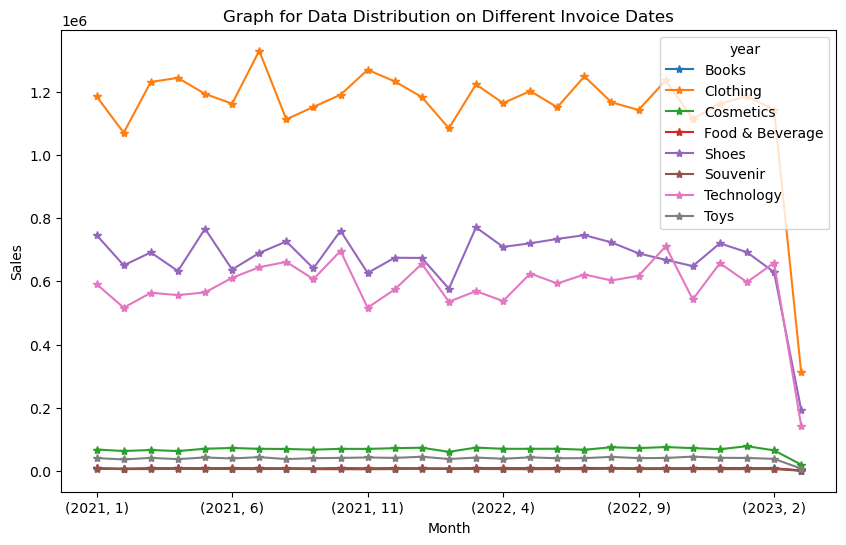

In [33]:



df["invoice_date"]= pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df['month']= df['invoice_date'].dt.month
df['year']= df['invoice_date'].dt.year

ordered=df.groupby(['category','year','month'])['price'].sum().reset_index()
ordered2= ordered.pivot_table(index=["year","month"],columns='category',values='price')

ordered2.plot(kind='line', marker='*',figsize=(10,6))
plt.title("Graph for Data Distribution on Different Invoice Dates")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="year",loc="upper right")



plt.show()

In [ ]:
print(max(df['quantity']))

# HARD QUESTION

In [ ]:
#Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [ ]:
print(df)


In [44]:
new_data = pd.merge(df, df2, how="outer", left_on='customer_id', right_on='id')

heyo = new_data.groupby(['category','age']).sum('quantity')
print(heyo)
print(new_data)


               customer_id  quantity     price  month    year     id
category age                                                        
Books    18.0        44442       137   2075.55    290   88951  44442
         19.0        37928        92   1393.80    197   62673  37928
         20.0        38006       122   1848.30    254   82887  38006
         21.0        42297       100   1515.00    175   62675  42297
         22.0        63296       121   1833.15    264   88953  63296
...                    ...       ...       ...    ...     ...    ...
Toys     81.0        75626       187   6702.08    422  133431  75626
         82.0        80164       314  11253.76    602  208225  80164
         83.0        47709       135   4838.40    253   95020  47709
         84.0        48020       142   5089.28    289  103109  48020
         85.0        76999       205   7347.20    417  137469  76999

[544 rows x 6 columns]
      invoice_no  customer_id   category  quantity    price payment_method  \
0

In [38]:


def function(age):

        return (str((age//10)*10)+'-'+str((age//10)*10+9))

    


In [45]:
new_data2 = new_data.dropna(axis=0)
new_data2['decade'] = new_data2.iloc[:, 10].apply(function)
heyo = pd.pivot_table(new_data2, index=['category','decade'], values='quantity', aggfunc='sum')
print(heyo)


                    quantity
category decade             
Books    10.0-19.0       229
         20.0-29.0      1427
         30.0-39.0      1518
         40.0-49.0      1542
         50.0-59.0      1364
...                      ...
Toys     40.0-49.0      2983
         50.0-59.0      2626
         60.0-69.0      2797
         70.0-79.0      2078
         80.0-89.0      1201

[64 rows x 1 columns]


C:\Users\matth\AppData\Local\Temp\ipykernel_29800\1912329054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data2['decade'] = new_data2.iloc[:, 10].apply(function)


In [ ]:
new_data2.columns




In [ ]:
new_data3= new_data[['category','age','quantity']]
new_data4 = new_data3.dropna(axis=0)
new_data4['decade'] = new_data4.iloc[:, 1].apply(function)

new_data4.groupby(['category','decade']).sum('quantity')

In [43]:
print(new_data2.iloc[:, 8])

77       12
78        2
79       10
80        5
81        8
         ..
99447     6
99449    11
99453     1
99455    11
99456     8
Name: month, Length: 59352, dtype: int64
